In [1]:
# Handwritten Digit Recognition using ANN

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test)  = keras.datasets.mnist.load_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

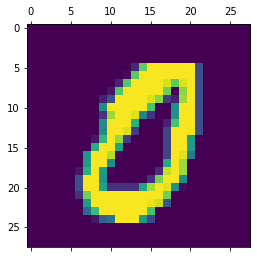

In [8]:
py.matshow(X_train[81])

In [9]:
y_train[81]

0

In [10]:
# Scaling the data

X_train = X_train/255
X_test = X_test/255

In [11]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(80, activation = 'relu'), 
    keras.layers.Dense(50, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid') 
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2732 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1191 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0668 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - accuracy: 0.9826


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 80)                62800     
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 67,360
Trainable params: 67,360
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9713


[0.09660948812961578, 0.9713000059127808]

In [15]:
import numpy as np

pred_res = model.predict(X_test)
np.argmax(pred_res[201])  #predicted value

6

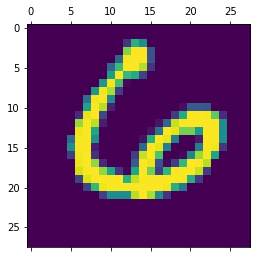

In [16]:
py.matshow(X_test[201])

In [17]:
y_test[201]  #actual value

6

Text(33.0, 0.5, 'Actual value')

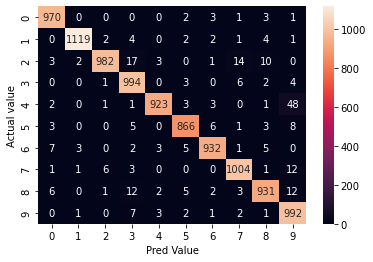

In [18]:
# confusion matrix

pred_res_val = [np.argmax(i) for i in pred_res]

cm = tf.math.confusion_matrix(labels = y_test, predictions = pred_res_val)
sns.heatmap(cm, annot = True, fmt='d')
py.xlabel('Pred Value')
py.ylabel('Actual value')

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_res_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.99      0.94      0.96       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.92      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

